In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('datos_act.xlsx')

In [3]:
df.head()

Edad Sexo  Estatura  Num Zapato En una relacion Trabajo Color Favorito
0    23    M       157          24              NO      NO          VERDE
1    25    H       174          27              NO      NO          VERDE
2    22    H       165          26              NO      NO          NEGRO
3    21    H       187          29              NO      NO           AZUL
4    23    M       163          25              SI      SI           ROJO

In [5]:
df['p_niña'] = (df.Sexo=='M').astype(int)

In [6]:
df.p_niña.value_counts(True)

0    0.517241
1    0.482759
Name: p_niña, dtype: float64

In [39]:
X = df[['Estatura','Num Zapato']].copy()

In [40]:
X.head()

Estatura  Num Zapato
0       157          24
1       174          27
2       165          26
3       187          29
4       163          25

In [41]:
y = df['p_niña'].copy()

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA

In [43]:
modelo = LogisticRegression()

In [64]:
sc = StandardScaler()
sc.fit(X)
Xs = pd.DataFrame(sc.transform(X),columns=['Estatura','Num Zapato'])

In [65]:
scm = MinMaxScaler()
scm.fit(X)
Xm = pd.DataFrame(sc.transform(X),columns=['Estatura','Num Zapato'])

In [69]:
pca = PCA()
scm.fit(Xs)
Xp = pd.DataFrame(sc.transform(X),columns=['p1','p2'])

In [70]:
Xt, Xv, yt, yv = train_test_split(Xs,y,train_size=0.8)

In [71]:
print (Xt.shape)
print (Xv.shape)
print (yt.shape)
print (yv.shape)

(46, 2)
(12, 2)
(46,)
(12,)


In [72]:
modelo.fit(Xt,yt)

/home/jose/Documentos/unam/repos/cdd_2020_1/lib64/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
modelo.coef_

array([[-0.95806216, -2.00032407]])

In [74]:
modelo.intercept_

array([-0.49064922])

In [75]:
print (accuracy_score(y_pred=modelo.predict(Xt),y_true=yt))
print (accuracy_score(y_pred=modelo.predict(Xv),y_true=yv))

0.9130434782608695
0.9166666666666666


In [76]:
print (roc_auc_score(y_score=modelo.predict_proba(Xt)[:,1],y_true=yt))
print (roc_auc_score(y_score=modelo.predict_proba(Xv)[:,1],y_true=yv))

0.9788461538461538
1.0


(array([16.,  2.,  1.,  4.,  1.,  2.,  5.,  5.,  3.,  7.]),
 array([0.00101293, 0.10044222, 0.19987151, 0.2993008 , 0.39873008,
        0.49815937, 0.59758866, 0.69701795, 0.79644724, 0.89587653,
        0.99530582]),
 <a list of 10 Patch objects>)

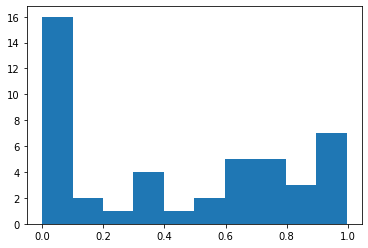

In [77]:
plt.hist(modelo.predict_proba(Xt)[:,1])

In [81]:
x  = sc.transform(np.array([[173,26]]))
print(modelo.predict_proba(x))
print(modelo.predict(x))

[[0.79578941 0.20421059]]
[0]


In [82]:
confusion_matrix(y_pred=modelo.predict(Xt),y_true=yt)

array([[23,  3],
       [ 1, 19]])

In [87]:
confusion_matrix(y_pred=modelo.predict(Xv),y_true=yv)

array([[4, 0],
       [1, 7]])

In [88]:
confusion_matrix(y_pred=modelo.predict(Xs),y_true=y)

array([[27,  3],
       [ 2, 26]])

In [83]:
import seaborn as sns

In [85]:
Xp['Sexo'] = df['Sexo']

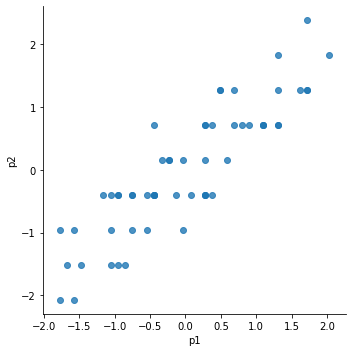

In [84]:
sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False)

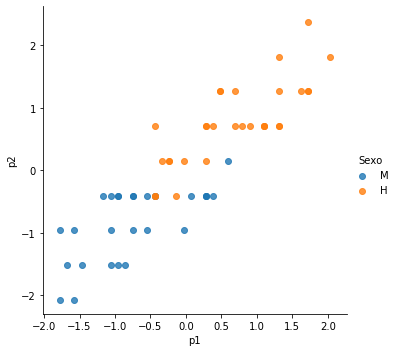

In [86]:
sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False,hue='Sexo')